# Lab5 - Introduction to Deep Neural Network
- Woraphol Sae-ku, 1084
- Chanon Ketkarn, 1091

Name your file to 34xx_34xx.ipynb

## Lab Instruction

In this lab, you will learn how to build a simple fully-connected neural network with Keras and Tensorflow as the backend. We will experiment with MNIST data, which is a Keras built-in dataset.

There are three questions to answer in this lab.

See http://yann.lecun.com/exdb/mnist/ for data description.

First, import all of the libraries that will be used in this lab.

In [98]:
import keras
import numpy as np

In [99]:
from keras.datasets import mnist

### Load Data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#################

### 1. Learn About the Data

Understand your data, such as its shape, format, datatype, structure, distribution, data classes, and so on.

### Type of dataset

In [100]:
print('Feature type: %s'%type(train_images))
print('Label type: %s'%type(train_labels))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


### Type of value in the dataset

In [101]:
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


### Shape

In [102]:
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


### Dimension

In [103]:
print('Train_set Feature dimension: %s'%str(train_images.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_images.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


### Characteristic of data

In [104]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

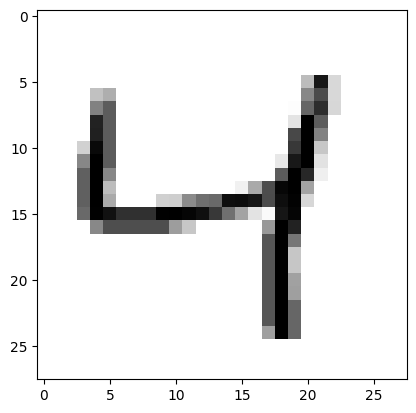

In [105]:
digit = train_images[2]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)

In [106]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 2. Build Neural Network Model

Build a two-layer neural network (except for the input and output layers) using `Sequential()`
( See https://keras.io/models/sequential )
> INPUT -> LINEAR -> RELU -> LINEAR -> SOFTMAX

with the hidden layer of size 512.

See Keras Model: https://keras.io/models/about-keras-models/

In [107]:
from keras import models
from keras import layers

Compile your model with the following argument.

```
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
```

In [108]:
network = models.Sequential()
network.add(layers.Dense(512, activation='linear',input_shape=(28*28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='linear'))
network.add(layers.Dense(10, activation='softmax'))

In [109]:
network.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Let's see how our model looks using `.summary()`

In [110]:
network.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dense_26 (Dense)            (None, 512)               262656    
                                                                 
 dense_27 (Dense)            (None, 10)                5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable params: 932362 (3.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. Preprocessing

- Reshape (flatten) the features data and normalize the value to be between 0 and 1
- One-hot the target data

In [111]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [112]:
from keras.utils import to_categorical

In [113]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [114]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [115]:
test_labels.shape

(10000, 10)

### 4. Model Training

Use `.fit()` to train your neural network model and return a record of accuracy and loss values for each epoch.

We will train the model for 10 epochs (If you are confident in your computer's performance, you can train the model with more epochs.)

We will train using the mini-batch method, with each batch containing 128 data points.

To avoid overfitting with the test set, we will split the current training data into 90% for training and 10% for validating the model.

This will take approximately one minute.

In [116]:
history = network.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 10s 23ms/step - loss: 0.8016 - accuracy: 0.8079 - val_loss: 0.3542 - val_accuracy: 0.9115
Epoch 2/10
422/422 [==============================] - 10s 23ms/step - loss: 0.3775 - accuracy: 0.8964 - val_loss: 0.2736 - val_accuracy: 0.9257
Epoch 3/10
422/422 [==============================] - 11s 25ms/step - loss: 0.3203 - accuracy: 0.9100 - val_loss: 0.2443 - val_accuracy: 0.9317
Epoch 4/10
422/422 [==============================] - 10s 24ms/step - loss: 0.2879 - accuracy: 0.9185 - val_loss: 0.2224 - val_accuracy: 0.9377
Epoch 5/10
422/422 [==============================] - 8s 19ms/step - loss: 0.2642 - accuracy: 0.9251 - val_loss: 0.2061 - val_accuracy: 0.9428
Epoch 6/10
422/422 [==============================] - 10s 24ms/step - loss: 0.2440 - accuracy: 0.9308 - val_loss: 0.1918 - val_accuracy: 0.9490
Epoch 7/10
422/422 [==============================] - 8s 19ms/step - loss: 0.2271 - accuracy: 0.9353 - val_loss: 0.1802 - val_accuracy: 0

We will plot the loss and accuracy of both the train and validate sets over iterations.

In [117]:
import  matplotlib.pyplot  as plt
%matplotlib inline

In [118]:
# The function argument is the model's history during the training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

def plot_acc_fn(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

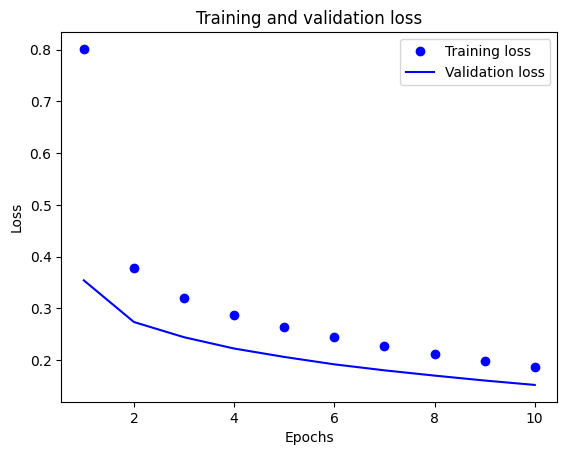

In [119]:
plot_loss_fn(history)

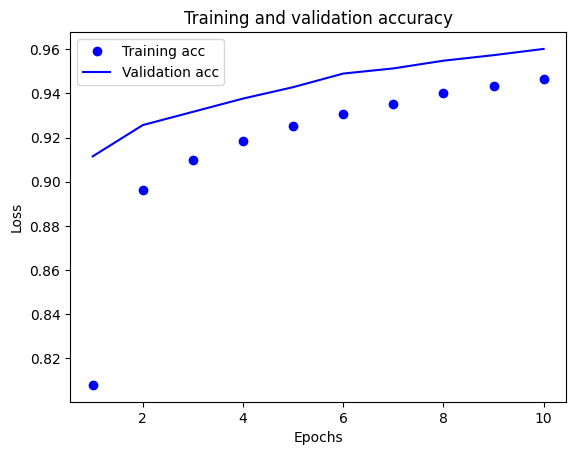

In [120]:
plot_acc_fn(history)

Q: At which iteration does your model start to overfit? Give your rational.

**ANSWER**
model ยังไม่เกิด overfit เพราะ training accuracy ยังต่ำกว่า varidation accuracy ถ้าจะเกิด overfit น่าจะต้อง train หลายๆ epoch มากกว่านี้

### 5. Model Evaluation

Evaluate your model with test set using `.evaluate()` and compare the results to those from the training and validate sets. Does your model overfit or underfit? How about the bias and variance?

In [121]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 2s 7ms/step - loss: 0.1783 - accuracy: 0.9465
Test Loss: 0.17833353579044342
Test Accuracy: 0.9465000033378601


In [122]:
history.history

{'loss': [0.8016270399093628,
  0.3774896264076233,
  0.32033029198646545,
  0.2878974378108978,
  0.2641838490962982,
  0.24402397871017456,
  0.22709713876247406,
  0.21195444464683533,
  0.19871990382671356,
  0.18684391677379608],
 'accuracy': [0.8079444169998169,
  0.8964444398880005,
  0.9100000262260437,
  0.9185185432434082,
  0.9251296520233154,
  0.930814802646637,
  0.9353148341178894,
  0.9401481747627258,
  0.9435370564460754,
  0.9465925693511963],
 'val_loss': [0.3541794717311859,
  0.27364206314086914,
  0.24425622820854187,
  0.2223840355873108,
  0.20612815022468567,
  0.1918146014213562,
  0.18022947013378143,
  0.17003858089447021,
  0.16053490340709686,
  0.1520243138074875],
 'val_accuracy': [0.9114999771118164,
  0.9256666898727417,
  0.9316666722297668,
  0.937666654586792,
  0.9428333044052124,
  0.9490000009536743,
  0.9513333439826965,
  0.9548333287239075,
  0.9573333263397217,
  0.9601666927337646]}

Q: Analyze the performance of your model using a confusion matrix. Which class does your model frequently misclassify? What is the precision and recall of your model?

In [123]:
prob_labels = network.predict(x=test_images, batch_size=128)
classes_labels = np.argmax(prob_labels, axis=1)

79/79 [==============================] - 1s 12ms/step


In [124]:
classes_labels

array([7, 2, 1, ..., 4, 5, 6])

In [125]:
classes_labels = to_categorical(classes_labels)

In [126]:
from sklearn.metrics import classification_report, confusion_matrix

### evaluate your model ###
print(classification_report(test_labels, classes_labels))
###########################

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.93      0.94      0.94      1010
           4       0.94      0.95      0.94       982
           5       0.96      0.90      0.93       892
           6       0.94      0.96      0.95       958
           7       0.95      0.94      0.94      1028
           8       0.92      0.94      0.93       974
           9       0.93      0.93      0.93      1009

   micro avg       0.95      0.95      0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000
 samples avg       0.95      0.95      0.95     10000




**ANSWER**

precision = 0.95, recall = 0.95

### 6. Model tuning

Try tuning your model by:
1. Adjust the learning rate of your optimizer by increasing and decreasing the learning rate to see how it affects your model.
2. Experiment with different optimizers ('sgd', 'rmspop', 'adagrad', 'adam', See https://keras.io/optimizers ) to see which one converges faster.
3. Change the structure of your model by adding more hidden layers with any number of nodes, and then observe how this affects your model.

In [127]:
# 1. Adjust the learning rate
from keras.optimizers import SGD
learning_rates = [0.01, 0.001, 0.0001]
learning_rate_histories = []

for lr in learning_rates:
    learning_rate_network = models.clone_model(network)
    learning_rate_network.compile(optimizer=SGD(learning_rate=lr),
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

    print(f"\nTraining Model with Learning Rate: {lr}")
    learning_rate_histories.append(learning_rate_network.fit(train_images, train_labels, epochs=10, batch_size=128,
                                            validation_data=(test_images, test_labels)))


Training Model with Learning Rate: 0.01
Epoch 1/10
469/469 [==============================] - 11s 22ms/step - loss: 0.7505 - accuracy: 0.8113 - val_loss: 0.3846 - val_accuracy: 0.8953
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.3575 - accuracy: 0.8998 - val_loss: 0.3101 - val_accuracy: 0.9123
Epoch 3/10
469/469 [==============================] - 11s 23ms/step - loss: 0.3030 - accuracy: 0.9145 - val_loss: 0.2730 - val_accuracy: 0.9221
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.2715 - accuracy: 0.9231 - val_loss: 0.2488 - val_accuracy: 0.9300
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.2473 - accuracy: 0.9301 - val_loss: 0.2346 - val_accuracy: 0.9329
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.2277 - accuracy: 0.9357 - val_loss: 0.2132 - val_accuracy: 0.9406
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.2113 - accuracy: 0

In [128]:
def plot_accuracy_learning_rate(learning_rate_histories, learning_rates):
    num_plots = len(learning_rate_histories)

    plt.figure(figsize=(15, 4))

    for i, history in enumerate(learning_rate_histories, 1):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        epochs = range(1, len(acc) + 1)

        plt.subplot(1, num_plots, i)
        plt.plot(epochs, acc, label='Training acc')
        plt.plot(epochs, val_acc, label='Testing acc')

        plt.title(f'Training and testing accuracy (LR={learning_rates[i-1]})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

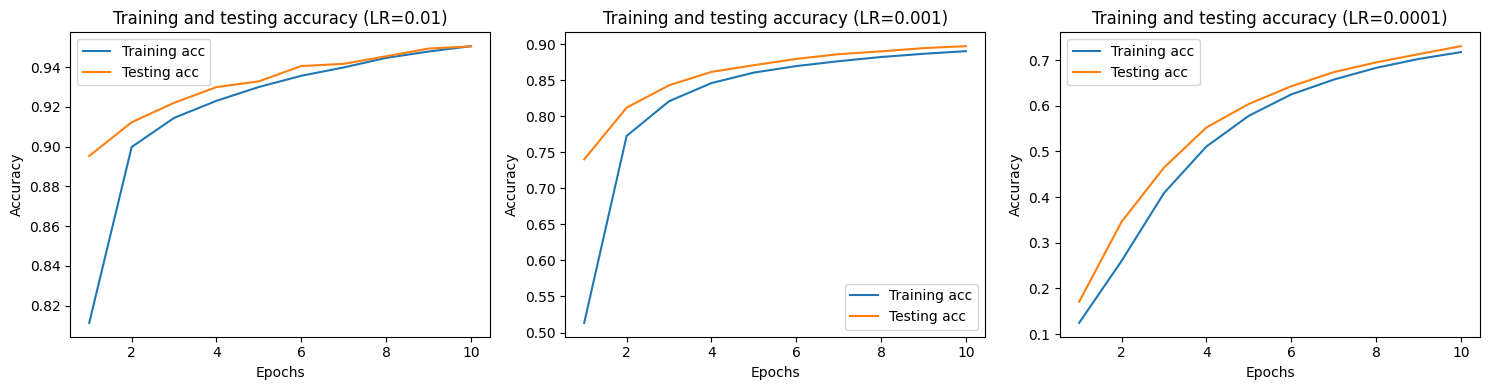

In [129]:
plot_accuracy_learning_rate(learning_rate_histories, learning_rates)

In [130]:
# 2. Experiment with different optimizers
from keras.optimizers import SGD, RMSprop, Adagrad, Adam
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']
optimizer_histories = []

for opt in optimizers:
    optimizer_network = models.clone_model(network)
    optimizer_network.compile(optimizer=opt,
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

    print(f"\nTraining Model with Optimizer: {opt}")
    optimizer_histories.append(optimizer_network.fit(train_images, train_labels, epochs=10, batch_size=128,
                                            validation_data=(test_images, test_labels)))


Training Model with Optimizer: sgd
Epoch 1/10
469/469 [==============================] - 11s 22ms/step - loss: 0.7471 - accuracy: 0.8148 - val_loss: 0.3905 - val_accuracy: 0.8944
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 0.3612 - accuracy: 0.8981 - val_loss: 0.3137 - val_accuracy: 0.9122
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.3078 - accuracy: 0.9123 - val_loss: 0.2783 - val_accuracy: 0.9220
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2761 - accuracy: 0.9219 - val_loss: 0.2557 - val_accuracy: 0.9279
Epoch 5/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2527 - accuracy: 0.9291 - val_loss: 0.2360 - val_accuracy: 0.9342
Epoch 6/10
469/469 [==============================] - 10s 22ms/step - loss: 0.2326 - accuracy: 0.9347 - val_loss: 0.2195 - val_accuracy: 0.9387
Epoch 7/10
469/469 [==============================] - 11s 24ms/step - loss: 0.2157 - accuracy: 0.9402 

In [131]:
def plot_accuracy_optimizer(optimizer_histories, optimizers):
    num_plots = len(optimizer_histories)

    plt.figure(figsize=(15, 4))

    for i, history in enumerate(optimizer_histories, 1):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        epochs = range(1, len(acc) + 1)

        plt.subplot(1, num_plots, i)
        plt.plot(epochs, acc, label='Training acc')
        plt.plot(epochs, val_acc, label='Testing acc')

        plt.title(f'Training and testing accuracy ({optimizers[i-1]})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

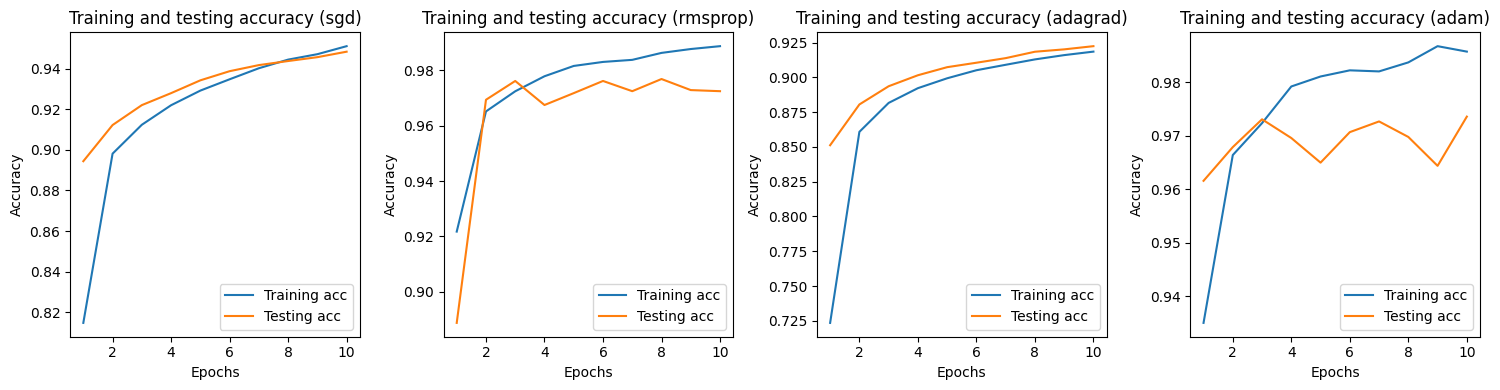

In [132]:
plot_accuracy_optimizer(optimizer_histories, optimizers)

In [133]:
# 3. Adding more hidden layers
new_network = models.Sequential()
new_network.add(layers.Dense(512, activation='linear', input_shape=(28 * 28,)))
new_network.add(layers.Dense(512, activation='relu'))
new_network.add(layers.Dense(512, activation='relu'))
new_network.add(layers.Dense(512, activation='relu'))
new_network.add(layers.Dense(512, activation='linear'))
new_network.add(layers.Dense(10, activation='softmax'))

new_network.compile(optimizer='sgd',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

print("\nTraining Model with Additional Hidden Layer")
new_history = new_network.fit(train_images, train_labels, epochs=10, batch_size=128,
                                        validation_split=0.1)


Training Model with Additional Hidden Layer
Epoch 1/10
422/422 [==============================] - 14s 32ms/step - loss: 0.9463 - accuracy: 0.7761 - val_loss: 0.3310 - val_accuracy: 0.9137
Epoch 2/10
422/422 [==============================] - 13s 31ms/step - loss: 0.3429 - accuracy: 0.9025 - val_loss: 0.2362 - val_accuracy: 0.9343
Epoch 3/10
422/422 [==============================] - 15s 36ms/step - loss: 0.2782 - accuracy: 0.9199 - val_loss: 0.2095 - val_accuracy: 0.9370
Epoch 4/10
422/422 [==============================] - 13s 32ms/step - loss: 0.2407 - accuracy: 0.9300 - val_loss: 0.1785 - val_accuracy: 0.9500
Epoch 5/10
422/422 [==============================] - 13s 30ms/step - loss: 0.2121 - accuracy: 0.9385 - val_loss: 0.1610 - val_accuracy: 0.9577
Epoch 6/10
422/422 [==============================] - 13s 30ms/step - loss: 0.1894 - accuracy: 0.9456 - val_loss: 0.1500 - val_accuracy: 0.9560
Epoch 7/10
422/422 [==============================] - 12s 29ms/step - loss: 0.1714 - accura

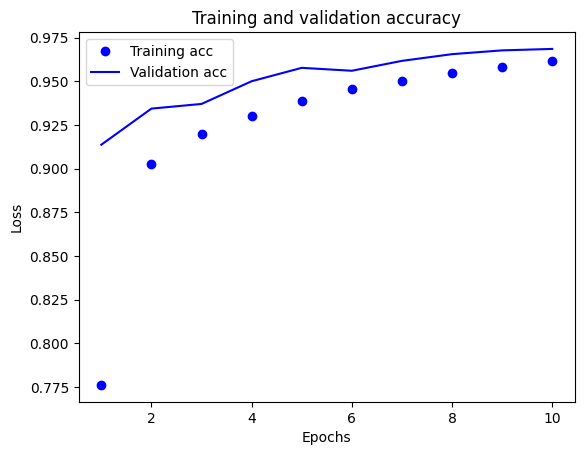

In [134]:
plot_acc_fn(new_history) #new

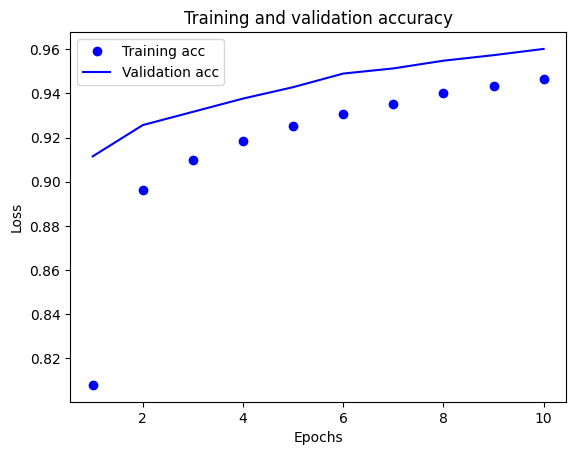

In [135]:
plot_acc_fn(history) #old

### 7. Discussion and Result
Q: Write down your findings from the previous step.

**ANSWER**

1. ยิ่ง learning rate สูงจะทำให้ accuracy ลู่เข้าได้ไวขึ้น<br>
2. optimizer adam สามารถลู่เข้าได้ไวที่สุด<br>
3. ยิ่งเพิ่มจำนวน layer ยิ่งทำให้ค่า accuracy สูงขึ้น แต่ก็จะทำให้ model overfit มากขึ้นไปด้วย
